In [ ]:
#Libraries used for this project are:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Import library needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load and Inspect the Data for covid_data
covid_data = pd.read_csv('/content/full_grouped.csv')

In [ ]:
# Standardise date and location formats
from datetime import datetime
from datetime import timedelta
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data['Country/Region'] = covid_data['Country/Region'].str.upper()

In [ ]:
covid_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,AFGHANISTAN,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,ALBANIA,0,0,0,0,0,0,0,Europe
2,2020-01-22,ALGERIA,0,0,0,0,0,0,0,Africa
3,2020-01-22,ANDORRA,0,0,0,0,0,0,0,Europe
4,2020-01-22,ANGOLA,0,0,0,0,0,0,0,Africa


In [ ]:
covid_data.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,WEST BANK AND GAZA,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,WESTERN SAHARA,10,1,8,1,0,0,0,Africa
35153,2020-07-27,YEMEN,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,ZAMBIA,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,ZIMBABWE,2704,36,542,2126,192,2,24,Africa


# New Section

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [ ]:
covid_data.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,35156,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2020-04-24 12:00:00,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
min,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,2020-03-08 18:00:00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2020-04-24 12:00:00,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,2020-06-10 06:00:00,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000
std,NaN,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852


In [ ]:
#The negative values present in the Active, New deaths, and New recovered, columns shows potential data quality issues that need to be addressed during data cleaning.These can be done by replacing them with Nan['Active'] = covid_data['Active'].apply(lambda x: np.nan if x < 0 else x)
covid_data['Active'] = covid_data['Active'].apply(lambda x: np.nan if x < 0 else x)
covid_data['New deaths'] = covid_data['New deaths'].apply(lambda x: np.nan if x < 0 else x)
covid_data['New recovered'] = covid_data['New recovered'].apply(lambda x: np.nan if x < 0 else x)

In [ ]:
#Cleaning: Address missing values, remove duplicates, and standardize date and location formats.
#Missing values =
covid_data.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,2
New cases,0
New deaths,38
New recovered,77
WHO Region,0


In [ ]:
#filling missing values with median
covid_data['Active'].fillna(covid_data['Active'].median(), inplace=True)
covid_data['New deaths'].fillna(covid_data['New deaths'].median(), inplace=True)
covid_data['New recovered'].fillna(covid_data['New recovered'].median(), inplace=True)

In [ ]:
covid_data.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [ ]:
#check the cleaned data
covid_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,AFGHANISTAN,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,ALBANIA,0,0,0,0,0,0,0,Europe
2,2020-01-22,ALGERIA,0,0,0,0,0,0,0,Africa
3,2020-01-22,ANDORRA,0,0,0,0,0,0,0,Europe
4,2020-01-22,ANGOLA,0,0,0,0,0,0,0,Africa


In [ ]:
import pandas as pd
# Assuming you have a DataFrame called 'df'
# covid_df.groupby('Country/Region')
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']


In [ ]:
#Remove duplicates
covid_data.duplicated().sum()

0

In [ ]:
#Normalize data for machine learning models, ensuring consistency across all numerical features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
covid_data[numerical_features] = scaler.fit_transform(covid_data[numerical_features])


covid_data[['Confirmed', 'Deaths', 'Recovered', 'Active']] = scaler.fit_transform(covid_data[['Confirmed', 'Deaths', 'Recovered', 'Active']])

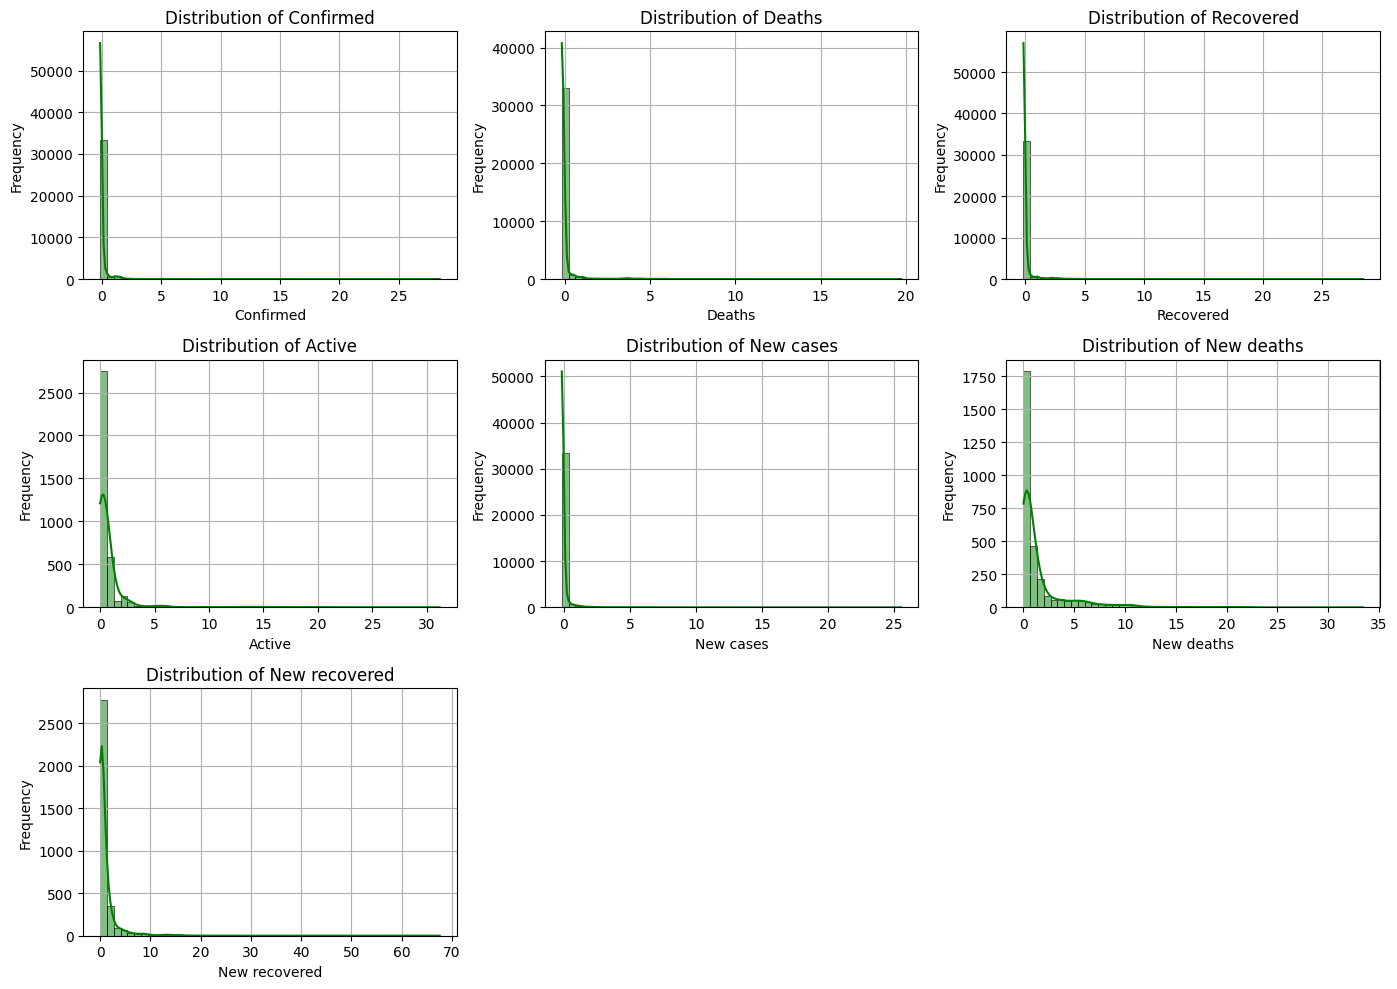

In [ ]:
#To plot histograms we encourage loop of the numerical column
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through the numerical columns and plot their histograms
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 columns of subplots
    sns.histplot(covid_data[col], kde=True, color='green', bins=50)  # You can adjust the number of bins as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

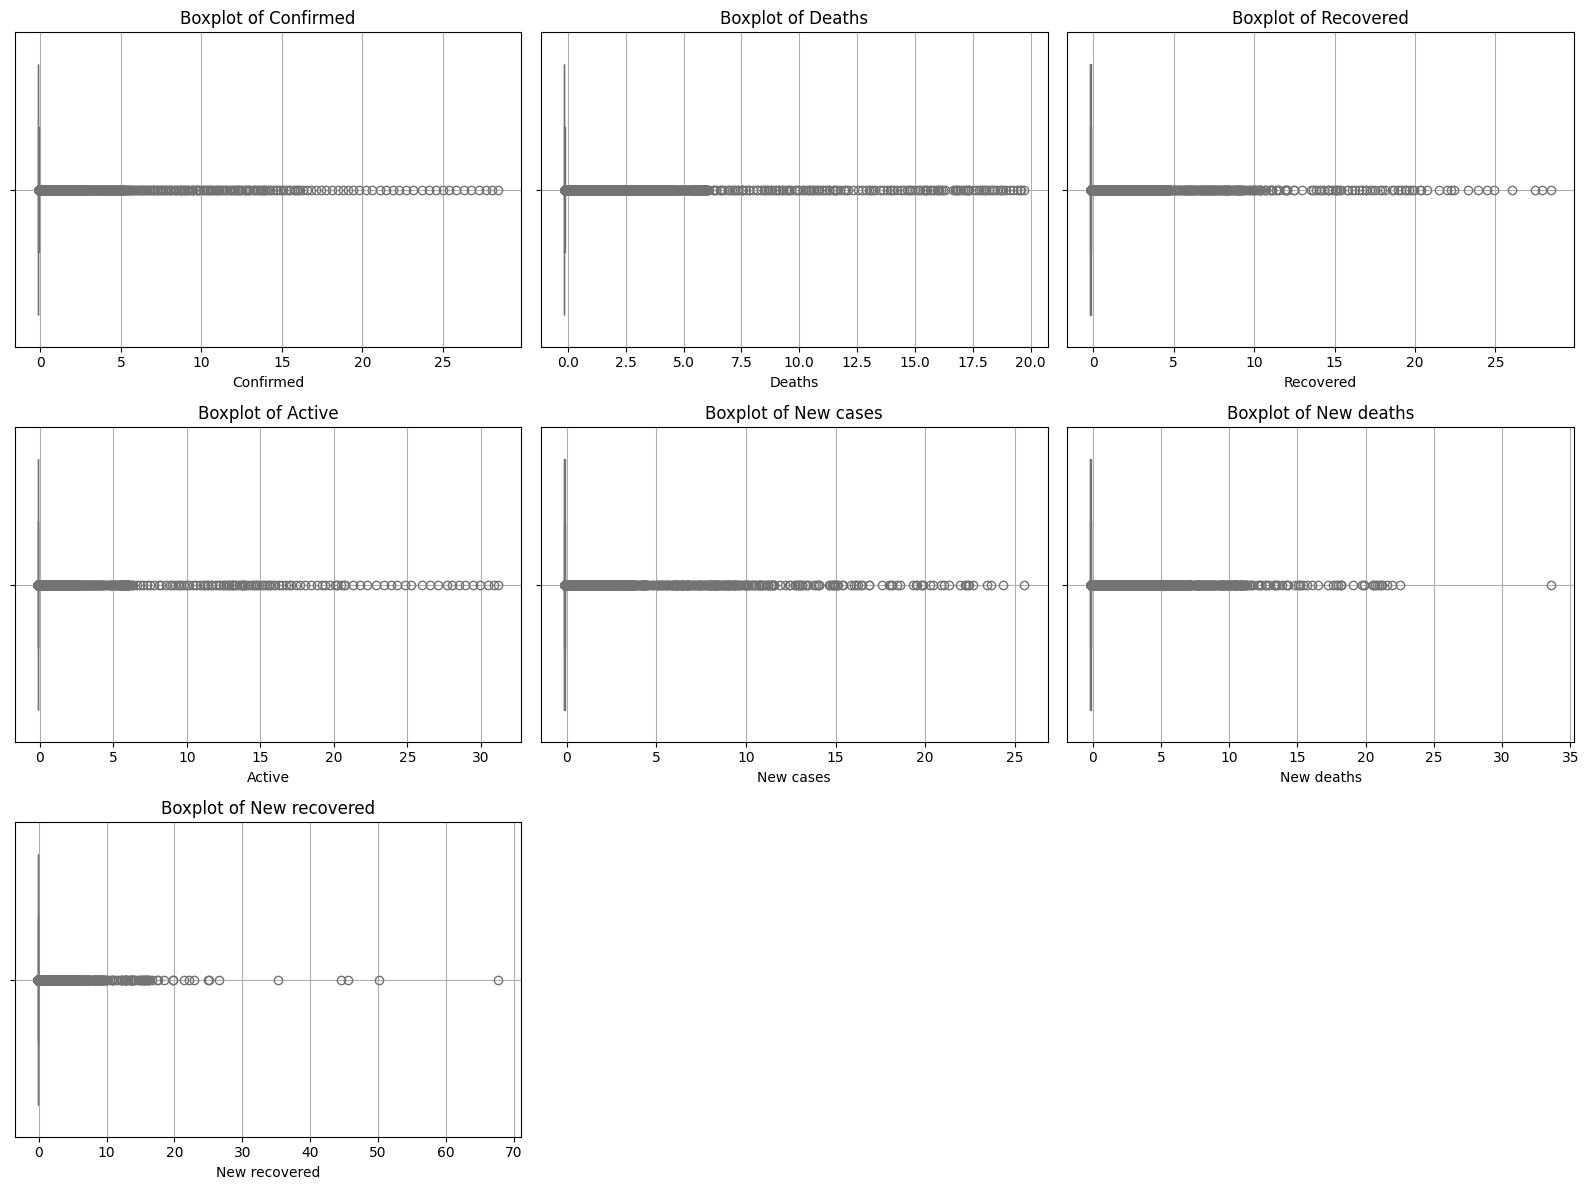

In [ ]:
# To check for outliers boxplots will be used for all numerical variables
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
plt.figure(figsize=(16, 12))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=covid_data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Exploratory Data Analysis
# Uncover trends

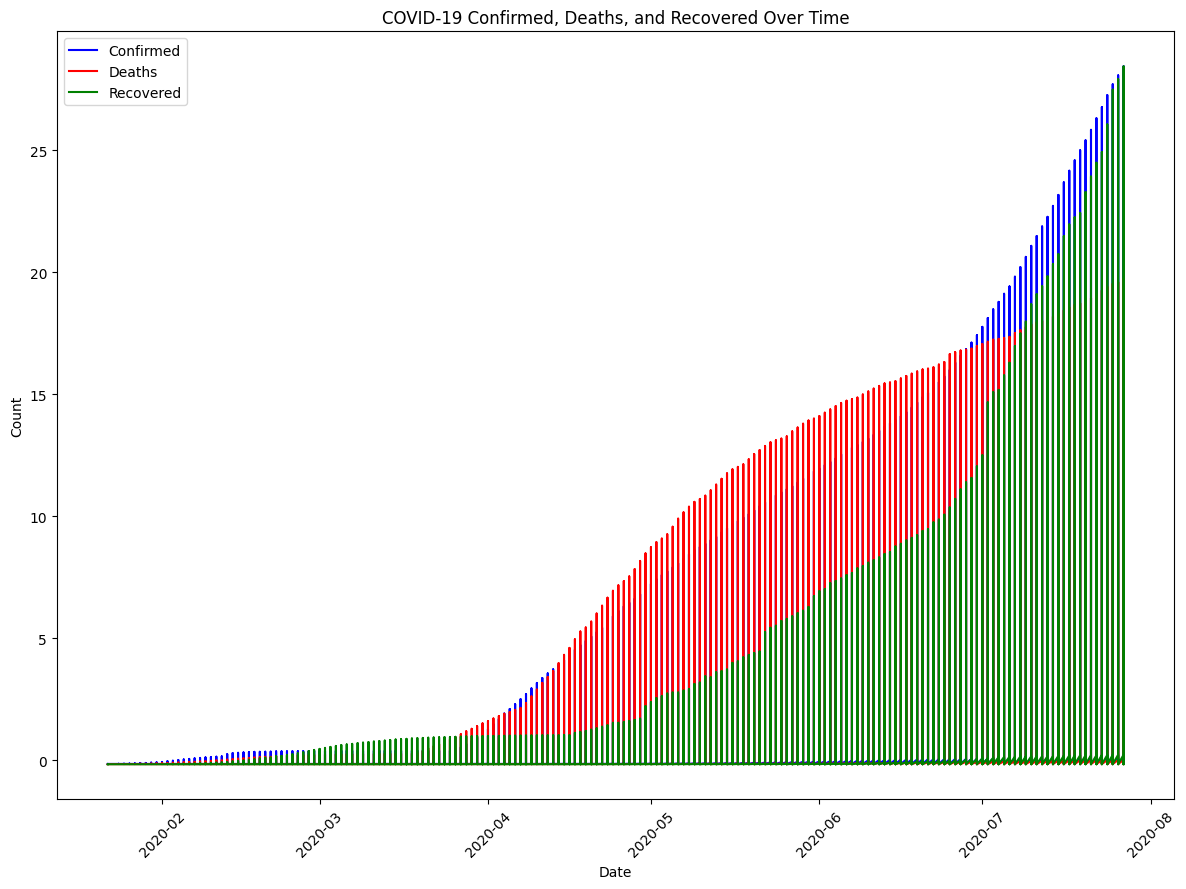

In [ ]:
#Analysis of COVID-19 trends
#Case Rates over Time: for covid_data
plt.figure(figsize=(12, 9))
plt.plot(covid_data['Date'], covid_data['Confirmed'], label='Confirmed', color='blue')
plt.plot(covid_data['Date'], covid_data['Deaths'], label='Deaths', color='red')
plt.plot(covid_data['Date'], covid_data['Recovered'], label='Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Confirmed, Deaths, and Recovered Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

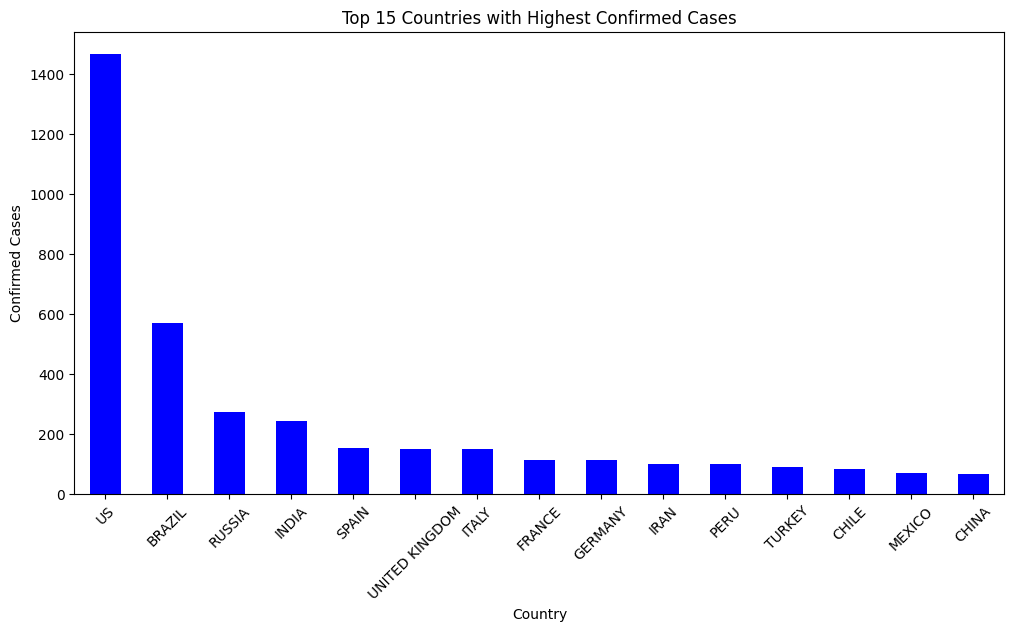

In [ ]:
#15 countries with the highest confirmed cases
highest_countries = covid_data.groupby('Country/Region')['Confirmed'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
highest_countries.plot(kind='bar', color='blue')
plt.title('15 Countries with Highest Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


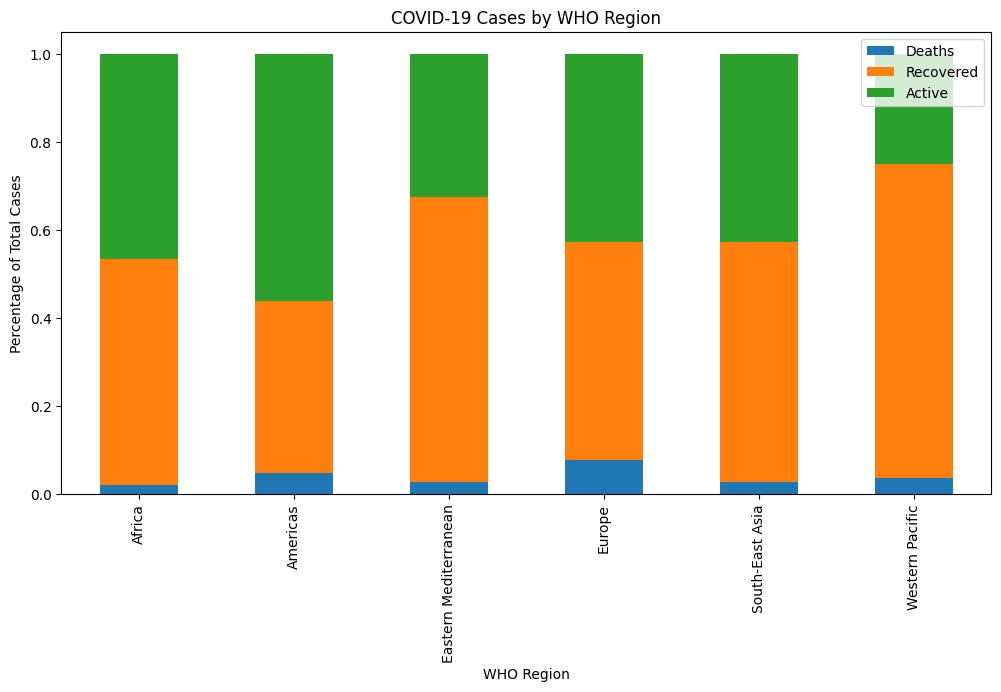

In [ ]:
#Comparism of WHO regions
who_region_stats = covid_data.groupby('WHO Region')[numerical_columns].sum().reset_index()
region_stats = covid_data.groupby('WHO Region')[['Deaths', 'Recovered', 'Active']].sum()
region_stats_percentage = region_stats.div(region_stats.sum(axis=1), axis=0)
region_stats_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('COVID-19 Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Percentage of Total Cases')
plt.show()

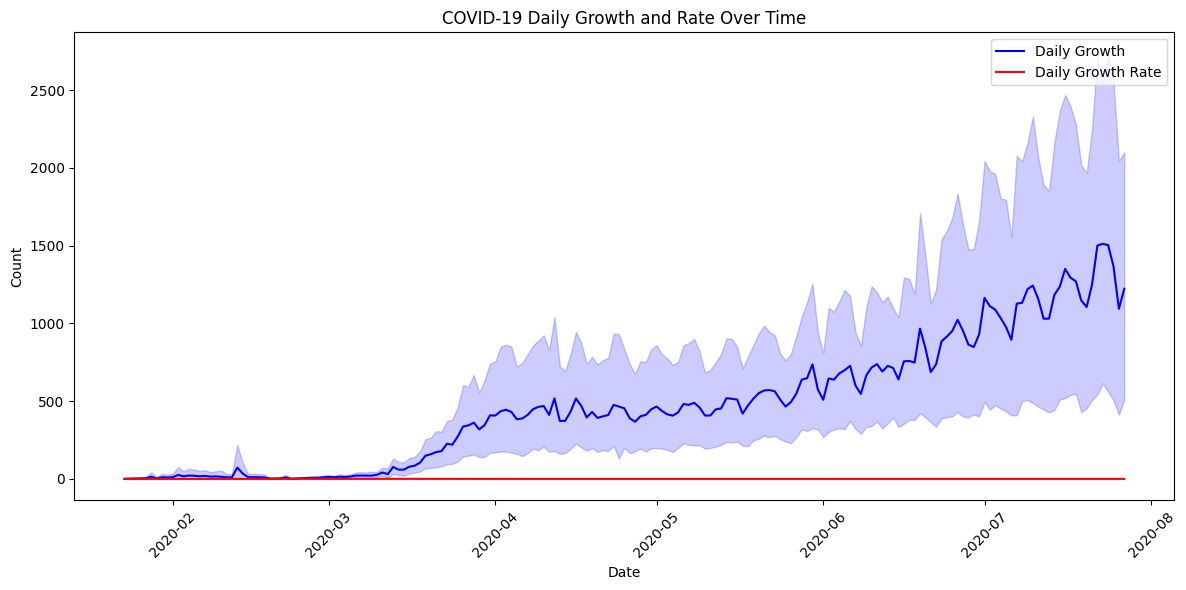

In [ ]:
#Create derived variables (daily growth rates)
covid_data['Daily Growth'] = covid_data.groupby('Country/Region')['Confirmed'].diff()


covid_data['Daily Growth Rate'] = covid_data.groupby('Country/Region')['Confirmed'].pct_change()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Daily Growth', data=covid_data, label='Daily Growth', color='blue')
sns.lineplot(x='Date', y='Daily Growth Rate', data=covid_data, label='Daily Growth Rate', color='red')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Daily Growth and Rate Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

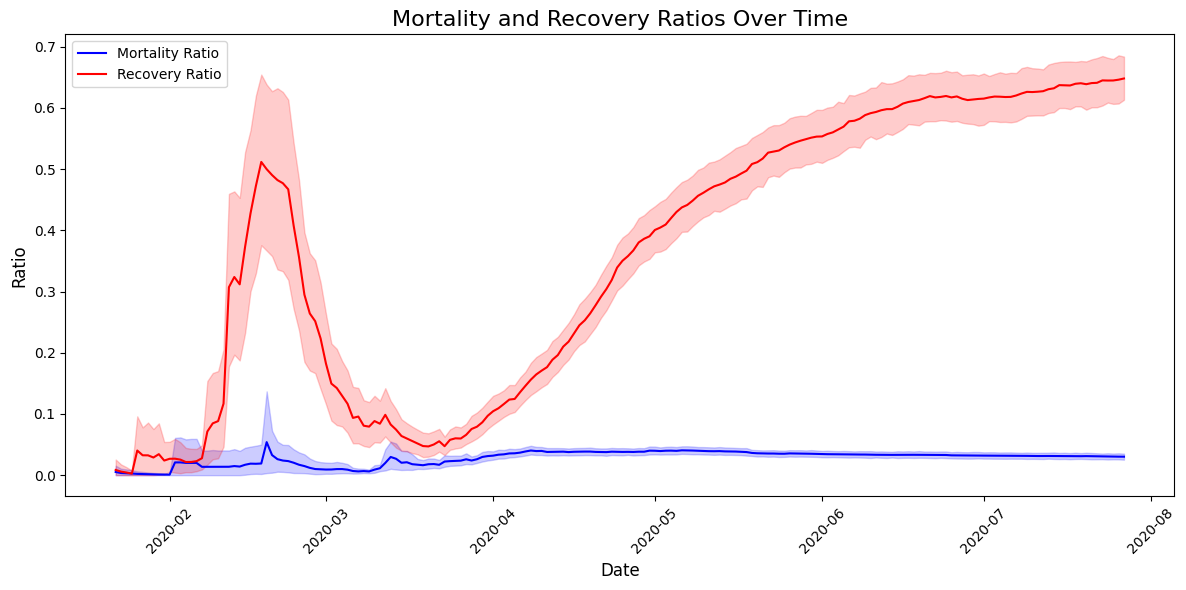

In [ ]:
#mortality ratios
covid_data['Mortality Ratio'] = covid_data['Deaths'] / covid_data['Confirmed']

#Recovering ratios
covid_data['Recovery Ratio'] = covid_data['Recovered'] / covid_data['Confirmed']

# Line plot of mortality ratio and Recovering ratios
plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='Mortality Ratio', data=covid_data, label='Mortality Ratio', color='blue')
sns.lineplot(x='Date', y='Recovery Ratio', data=covid_data, label='Recovery Ratio', color='red')
plt.title('Mortality and Recovery Ratios Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


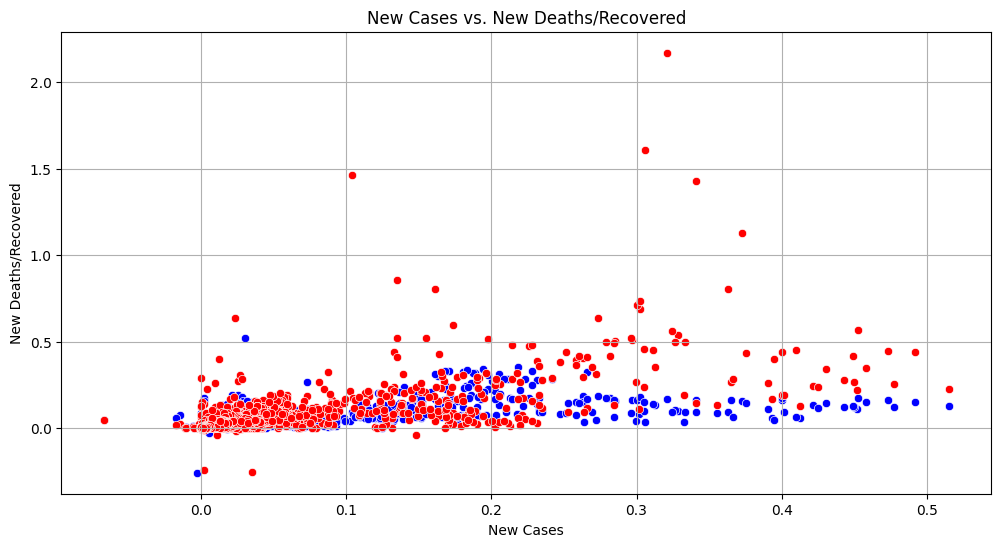

In [ ]:
#New case New Deaths and New Recovery
covid_data['New cases'] = covid_data.groupby('Country/Region')['Confirmed'].diff()
covid_data['New deaths'] = covid_data.groupby('Country/Region')['Deaths'].diff()
covid_data['New recovered'] = covid_data.groupby('Country/Region')['Recovered'].diff()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='New cases', y='New deaths', data=covid_data, color='blue')
sns.scatterplot(x='New cases', y='New recovered', data=covid_data, color='red')
plt.xlabel('New Cases')
plt.ylabel('New Deaths/Recovered')
plt.title('New Cases vs. New Deaths/Recovered')
plt.grid(True)
plt.show()

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

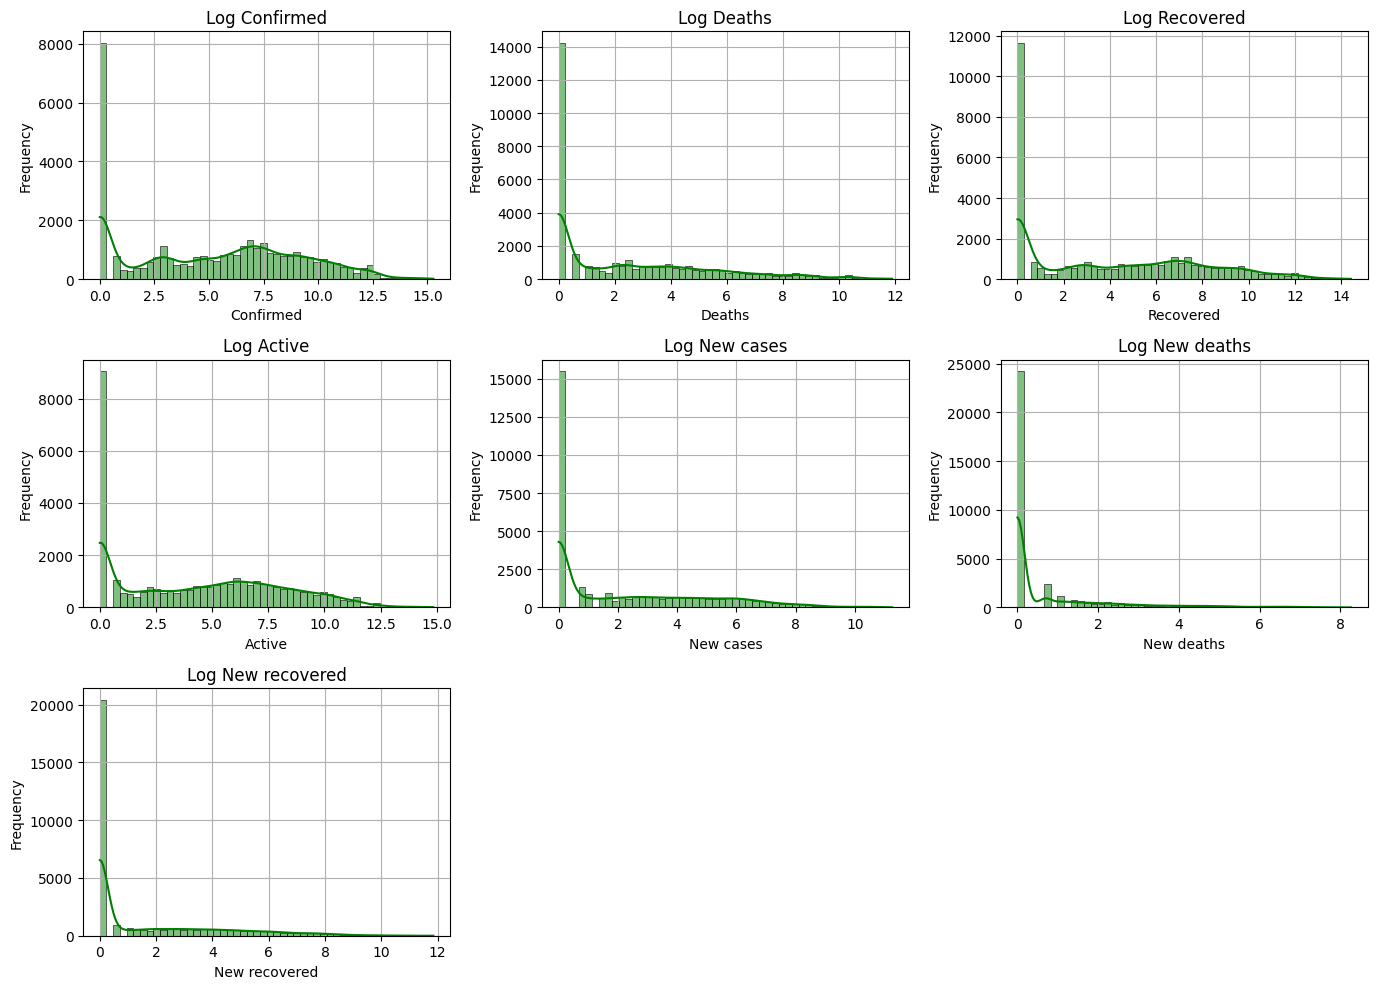

In [ ]:
#To plot histograms we encourage loop of the the column and log transformation to reduce skewness.
log_transformed_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
for col in log_transformed_features:
    covid_data[f'log_{col}'] = np.log1p(covid_data[col])  # log1p handles zeros by adding 1 before log

    plt.figure(figsize=(14, 10))
for i, col in enumerate(log_transformed_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(covid_data[f'log_{col}'], kde=True, color='green', bins=50)

    plt.title(f'Log {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

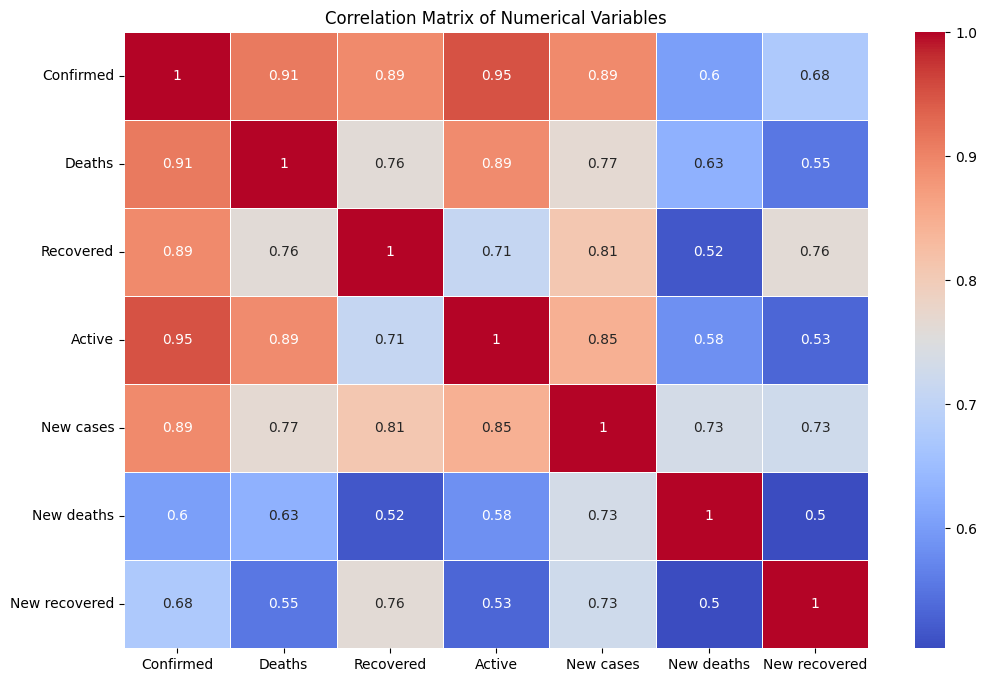

In [ ]:
#Correlations Analysis
correlation_matrix = covid_data[log_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
covid_data[numerical_features] = scaler.fit_transform(covid_data[numerical_features])

In [ ]:
covid_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,...,Daily Growth Rate,Mortality Ratio,Recovery Ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
0,2020-01-22,AFGHANISTAN,-0.157132,-0.165933,-0.171168,-0.125424,NaN,NaN,NaN,Eastern Mediterranean,...,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,NaN,NaN,NaN
1,2020-01-22,ALBANIA,-0.157132,-0.165933,-0.171168,-0.125424,NaN,NaN,NaN,Europe,...,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,NaN,NaN,NaN
2,2020-01-22,ALGERIA,-0.157132,-0.165933,-0.171168,-0.125424,NaN,NaN,NaN,Africa,...,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,NaN,NaN,NaN
3,2020-01-22,ANDORRA,-0.157132,-0.165933,-0.171168,-0.125424,NaN,NaN,NaN,Europe,...,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,NaN,NaN,NaN
4,2020-01-22,ANGOLA,-0.157132,-0.165933,-0.171168,-0.125424,NaN,NaN,NaN,Africa,...,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,NaN,NaN,NaN


In [ ]:
covid_data.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,...,Daily Growth Rate,Mortality Ratio,Recovery Ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
35151,2020-07-27,WEST BANK AND GAZA,-0.086316,-0.155445,-0.113039,-0.049944,-0.105919,-0.143983,-0.130581,Eastern Mediterranean,...,-0.011605,1.800890,1.309593,-0.090270,-0.168946,-0.119954,-0.051234,0.001013,0.000269,0.000000
35152,2020-07-27,WESTERN SAHARA,-0.157065,-0.165799,-0.171044,-0.125413,-0.156345,-0.161223,-0.130581,Africa,...,0.000000,1.055604,1.089000,-0.170866,-0.181281,-0.187589,-0.134003,0.000000,0.000000,0.000000
35153,2020-07-27,YEMEN,-0.145857,-0.100989,-0.158263,-0.121256,-0.153028,-0.126742,-0.113219,Eastern Mediterranean,...,-0.000457,0.692382,1.085051,-0.157657,-0.106460,-0.172287,-0.129262,0.000067,0.000538,0.000558
35154,2020-07-27,ZAMBIA,-0.126781,-0.147109,-0.127556,-0.107674,-0.132791,-0.152603,0.093681,Africa,...,-0.003720,1.160335,1.006107,-0.135569,-0.159123,-0.136456,-0.113923,0.000473,0.000134,0.007178
35155,2020-07-27,ZIMBABWE,-0.139103,-0.161093,-0.162771,-0.101794,-0.092649,-0.143983,-0.119007,Africa,...,-0.009119,1.158082,1.170147,-0.149780,-0.175655,-0.177658,-0.107356,0.001279,0.000269,0.000372


In [ ]:
covid_data.describe()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Daily Growth,Daily Growth Rate,Mortality Ratio,Recovery Ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
count,35156,3.515600e+04,3.515600e+04,3.515600e+04,35156.000000,3.496900e+04,3.496900e+04,3.496900e+04,34969.000000,34969.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,35156.000000,34969.000000,34969.000000,34969.000000
mean,2020-04-24 12:00:00,-6.467564e-18,9.701346e-18,-1.293513e-17,0.000000,-6.502150e-18,1.625537e-17,6.502150e-18,0.003142,0.005106,0.901192,1.245511,-0.081493,-0.097509,-0.093633,-0.066581,0.002966,0.002403,0.003827
min,2020-01-22 00:00:00,-1.571321e-01,-1.659333e-01,-1.711682e-01,-0.125424,-3.485136e+00,-1.669490e+01,-7.990863e+00,-0.066902,-26.949641,-6974.076661,-338.354026,-0.170945,-0.181442,-0.187738,-0.134016,-0.069245,-0.298265,-0.291026
25%,2020-03-08 18:00:00,-1.571255e-01,-1.659333e-01,-1.711682e-01,-0.125424,-1.563452e-01,-1.612234e-01,-1.305815e-01,0.000000,-0.000860,1.056011,1.087023,-0.170937,-0.181442,-0.187738,-0.134016,0.000000,0.000000,0.000000
50%,2020-04-24 12:00:00,-1.554652e-01,-1.653955e-01,-1.706569e-01,-0.124479,-1.553499e-01,-1.612234e-01,-1.305815e-01,0.000020,0.000000,1.056684,1.089327,-0.168969,-0.180797,-0.187121,-0.132937,0.000020,0.000000,0.000000
75%,2020-06-10 06:00:00,-1.328605e-01,-1.554118e-01,-1.512404e-01,-0.109263,-1.311321e-01,-1.526031e-01,-1.209358e-01,0.000507,0.000000,1.086323,1.096966,-0.142555,-0.168906,-0.163979,-0.115706,0.000507,0.000134,0.000310
max,2020-07-27 00:00:00,2.844847e+01,1.973569e+01,2.843875e+01,31.178758,2.547309e+01,3.334577e+01,6.741344e+01,0.515103,151.680339,770.316098,4779.001125,3.382642,3.031856,3.382312,3.471307,0.415483,0.420451,1.153665
std,NaN,1.000014e+00,1.000014e+00,1.000014e+00,1.000014,1.000014e+00,1.000014e+00,1.000014e+00,0.020098,0.935842,38.037858,26.245630,0.282961,0.310533,0.309038,0.243978,0.017821,0.014374,0.024801


In [ ]:
covid_data.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,187
New deaths,187
New recovered,187
WHO Region,0


In [ ]:
#Removing features without log
covid_data.drop(columns=['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'], inplace=True)

In [ ]:
covid_data.head()

,Date,Country/Region,WHO Region,Daily Growth,Daily Growth Rate,Mortality Ratio,Recovery Ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
0,2020-01-22,AFGHANISTAN,Eastern Mediterranean,NaN,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,-0.169782,-0.176737,-0.140447
1,2020-01-22,ALBANIA,Europe,NaN,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,-0.169782,-0.176737,-0.140447
2,2020-01-22,ALGERIA,Africa,NaN,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,-0.169782,-0.176737,-0.140447
3,2020-01-22,ANDORRA,Europe,NaN,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,-0.169782,-0.176737,-0.140447
4,2020-01-22,ANGOLA,Africa,NaN,NaN,1.056011,1.089327,-0.170945,-0.181442,-0.187738,-0.134016,-0.169782,-0.176737,-0.140447


In [ ]:
covid_data.tail()

,Date,Country/Region,WHO Region,Daily Growth,Daily Growth Rate,Mortality Ratio,Recovery Ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
35151,2020-07-27,WEST BANK AND GAZA,Eastern Mediterranean,152.0,0.014519,0.007344,0.353262,9.270683,4.369448,8.230311,8.823501,5.030438,1.098612,0.000000
35152,2020-07-27,WESTERN SAHARA,Africa,0.0,0.000000,0.100000,0.800000,2.397895,0.693147,2.197225,0.693147,0.000000,0.000000,0.000000
35153,2020-07-27,YEMEN,Eastern Mediterranean,10.0,0.005949,0.285630,0.492608,7.433667,6.182085,6.726233,5.929589,2.397895,1.609438,3.610918
35154,2020-07-27,ZAMBIA,Africa,71.0,0.015845,0.030756,0.618409,8.423542,4.948760,7.943073,7.376508,4.276666,0.693147,6.144186
35155,2020-07-27,ZIMBABWE,Africa,192.0,0.076433,0.013314,0.200444,7.902857,3.610918,6.297109,7.662468,5.262690,1.098612,3.218876


In [ ]:
covid_data.describe()

,Date,Daily Growth,Daily Growth Rate,Mortality Ratio,Recovery Ratio,log_Confirmed,log_Deaths,log_Recovered,log_Active,log_New cases,log_New deaths,log_New recovered
count,35156,34969.000000,2.713200e+04,27138.000000,27138.000000,35156.000000,35156.000000,35156.000000,3.515500e+04,35156.000000,3.513400e+04,3.510000e+04
mean,2020-04-24 12:00:00,471.272556,inf,0.031908,0.413742,5.140037,2.516249,4.060555,-inf,2.305311,-inf,-inf
min,2020-01-22 00:00:00,-10034.000000,-7.500000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,0.000000,-inf,-inf
25%,2020-03-08 18:00:00,0.000000,0.000000e+00,0.002907,0.090277,0.693147,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,2020-04-24 12:00:00,3.000000,1.373150e-02,0.018718,0.369083,5.525453,1.609438,3.526361,4.454347e+00,1.098612,0.000000e+00,0.000000e+00
75%,2020-06-10 06:00:00,76.000000,5.146055e-02,0.043094,0.714286,8.200082,4.372593,7.160263,7.282761e+00,4.330733,6.931472e-01,3.044522e+00
max,2020-07-27 00:00:00,77255.000000,inf,1.000000,1.001871,15.271858,11.905049,14.428879,1.485099e+01,11.254880,8.265650e+00,1.184976e+01
std,NaN,3014.351076,NaN,0.045518,0.335170,3.912907,2.848184,3.788731,NaN,2.649943,NaN,NaN


In [ ]:
covid_data.isnull().sum()

,0
Date,0
Country/Region,0
WHO Region,0
Daily Growth,187
Daily Growth Rate,8024
Mortality Ratio,8018
Recovery Ratio,8018
log_Confirmed,0
log_Deaths,0
log_Recovered,0


In [ ]:
covid_data.fillna(0, inplace=True)

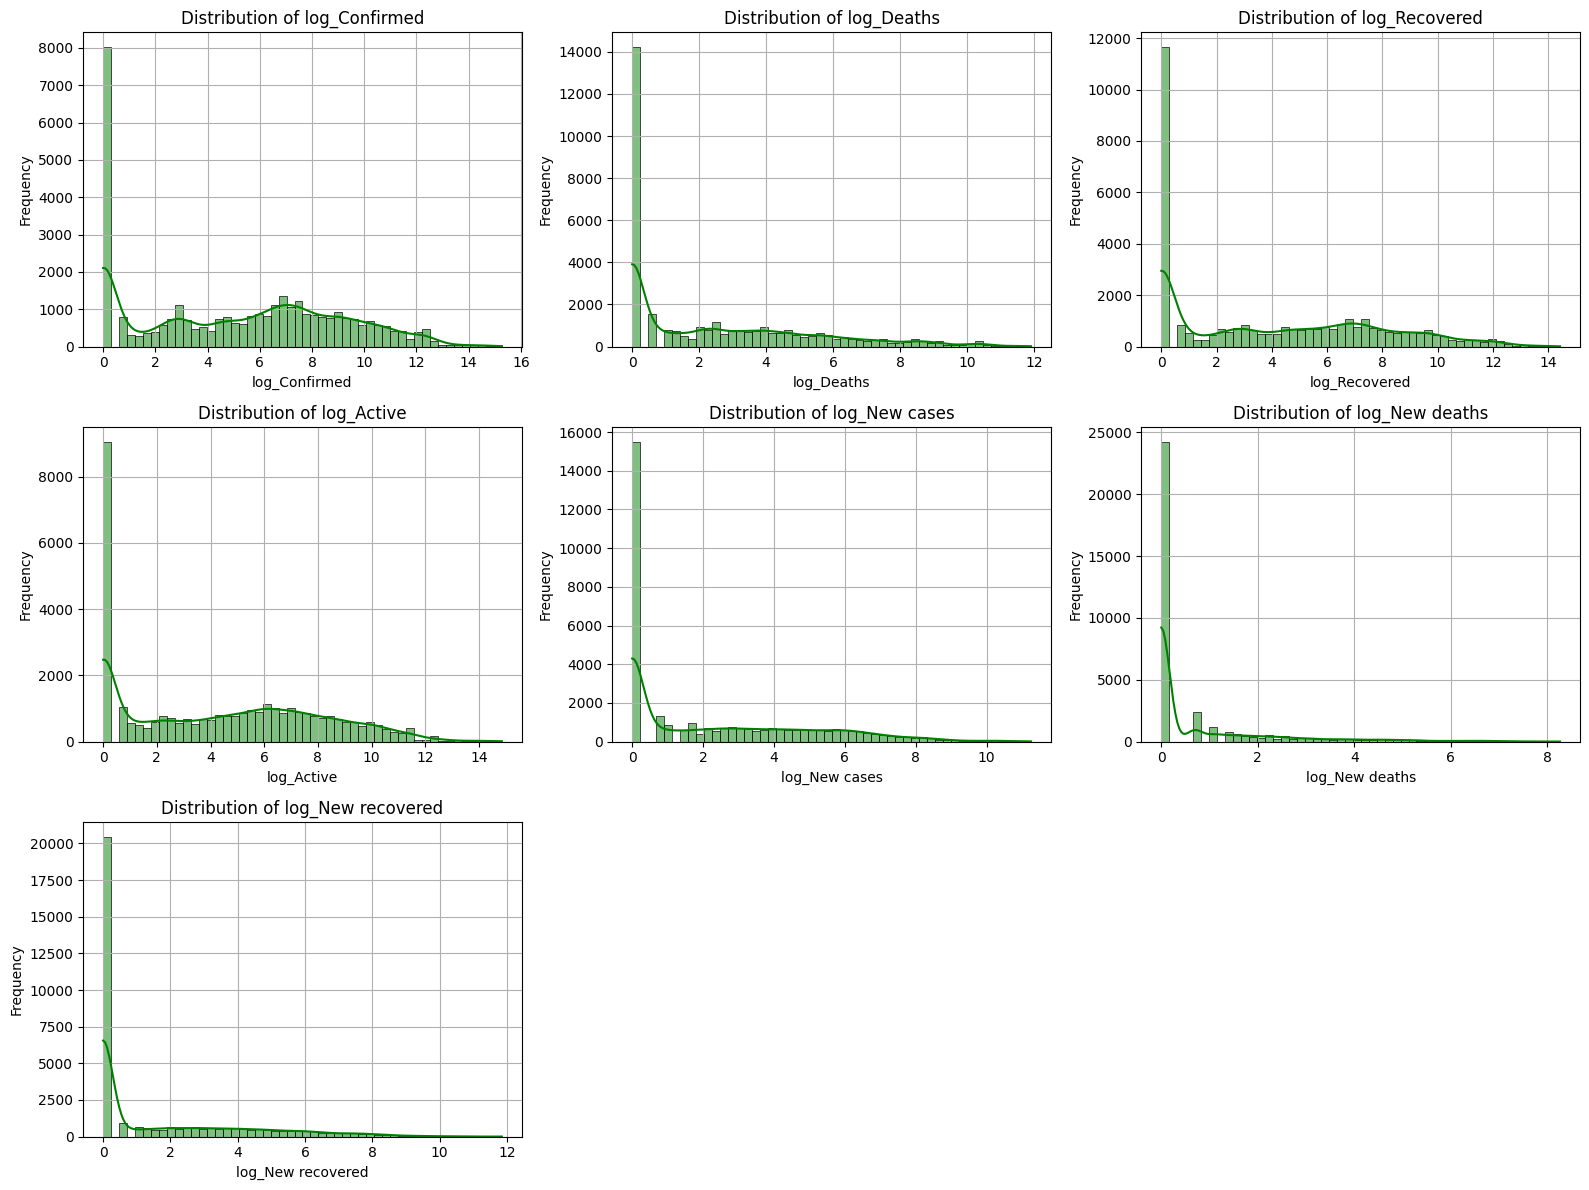

In [ ]:
numerical_features = ['log_Confirmed', 'log_Deaths', 'log_Recovered', 'log_Active', 'log_New cases', 'log_New deaths', 'log_New recovered']
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(covid_data[col], kde=True, color='green', bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

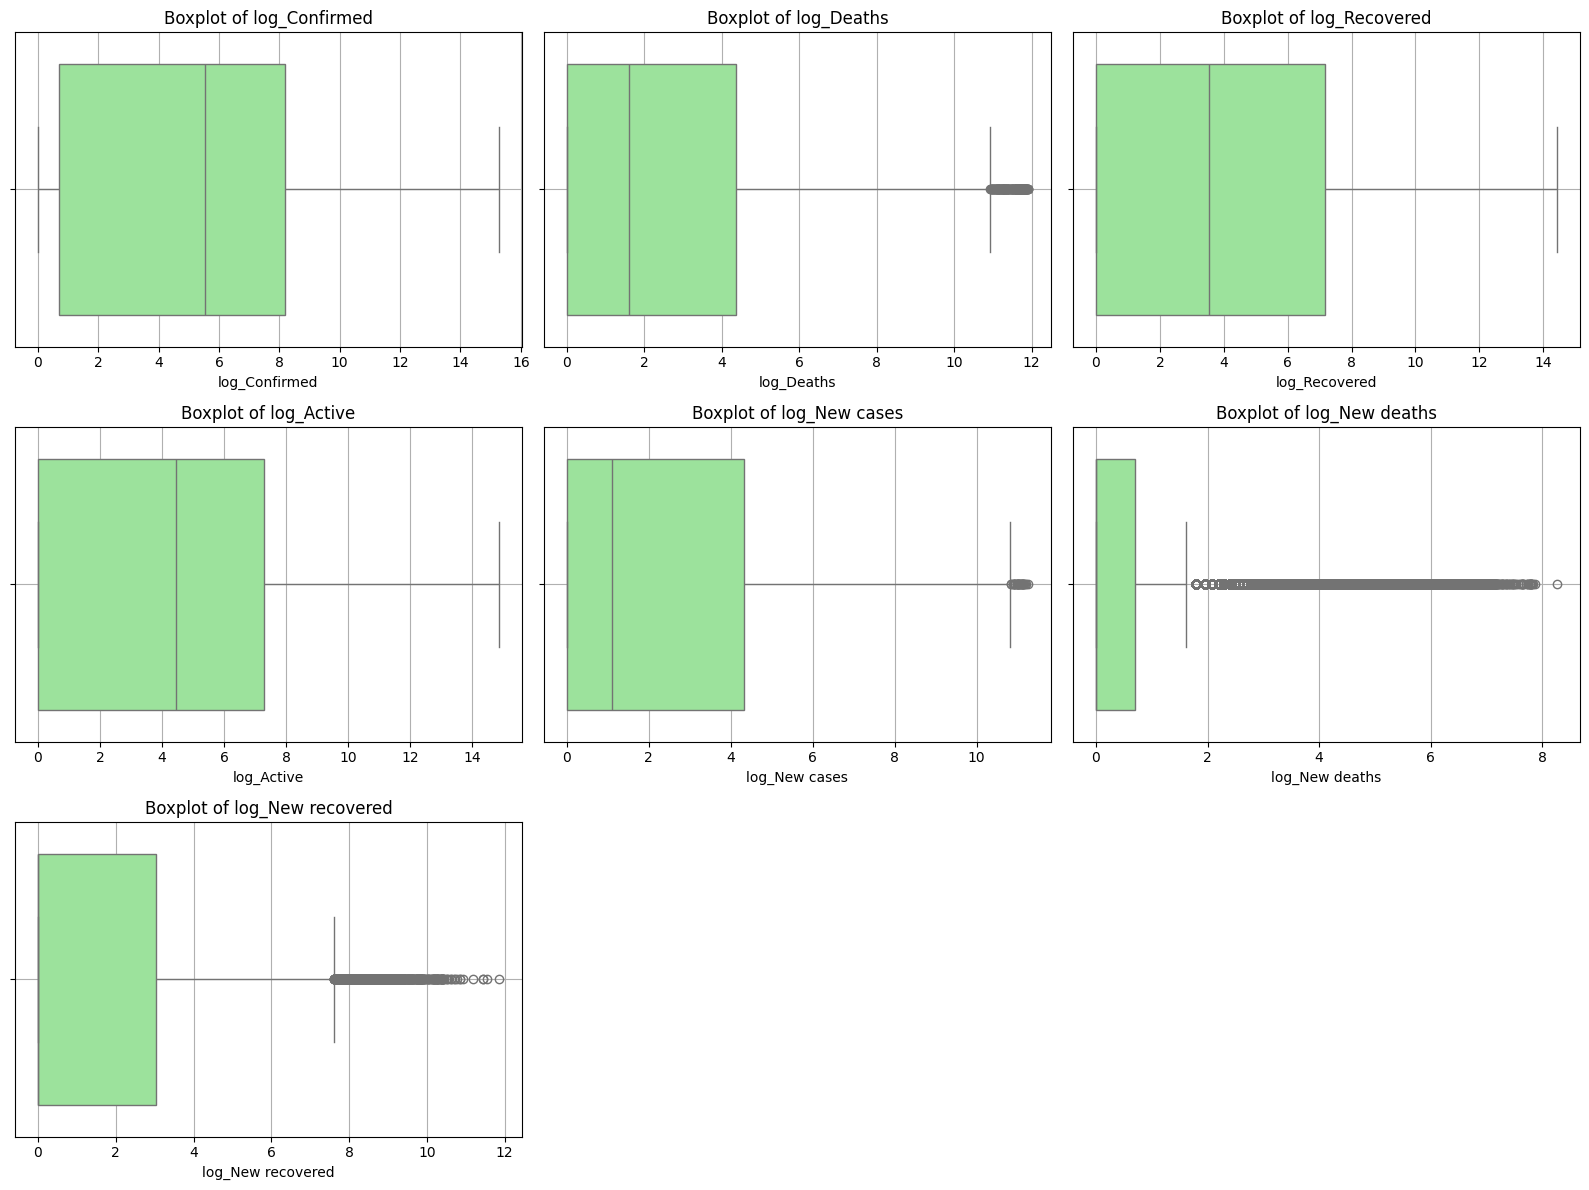

In [ ]:
#check for outlier using Boxplots for the numerical_features
numerical_features = ['log_Confirmed', 'log_Deaths', 'log_Recovered', 'log_Active', 'log_New cases', 'log_New deaths', 'log_New recovered']
plt.figure(figsize=(16, 12))
# Loop through numerical features and create boxplots
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=covid_data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Time Series Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
column = 'log_Confirmed'
series = covid_data[column]
# Check for stationarity with Adf test after the data has been cleaned and processed,
adf_test = adfuller(series)
adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Critical Values': adf_test[4],
    'Stationary': adf_test[1] < 0.05
}
# If non-stationary, difference the data
if not adf_result['Stationary']:
    series_diff = series.diff().dropna()
else:
    series_diff = series
print("ADF Test Results:")
print(adf_result)


ADF Test Results:
{'ADF Statistic': -7.4588928691257514, 'p-value': 5.419619331596529e-11, 'Critical Values': {'1%': -3.4305363025455717, '5%': -2.861622341128934, '10%': -2.5668138275937}, 'Stationary': True}


In [ ]:
model = ARIMA(series_diff, order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
#Forecast Analysis
forecast_steps = 40
forecast = model_fit.forecast(steps=forecast_steps)
print("Forecast:")
print(forecast)

Forecast:
35156    0.068502
35157    0.081719
35158    0.082519
35159    0.082567
35160    0.082570
35161    0.082570
35162    0.082570
35163    0.082570
35164    0.082570
35165    0.082570
35166    0.082570
35167    0.082570
35168    0.082570
35169    0.082570
35170    0.082570
35171    0.082570
35172    0.082570
35173    0.082570
35174    0.082570
35175    0.082570
35176    0.082570
35177    0.082570
35178    0.082570
35179    0.082570
35180    0.082570
35181    0.082570
35182    0.082570
35183    0.082570
35184    0.082570
35185    0.082570
35186    0.082570
35187    0.082570
35188    0.082570
35189    0.082570
35190    0.082570
35191    0.082570
35192    0.082570
35193    0.082570
35194    0.082570
35195    0.082570
Name: predicted_mean, dtype: float64


In [ ]:
Arima = pd.DataFrame(forecast)
Arima.columns = ['Confirmed']
Arima.index = covid_data['Date'][-forecast_steps:]


In [ ]:
#arima summary
Arima.head()

,Confirmed
Date,
2020-07-27,0.068502
2020-07-27,0.081719
2020-07-27,0.082519
2020-07-27,0.082567
2020-07-27,0.082570


In [ ]:
print("ARIMA Model Summary")
print(model_fit.summary())

ARIMA Model Summary
                               SARIMAX Results                                
Dep. Variable:          log_Confirmed   No. Observations:                35156
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3867.292
Date:                Mon, 02 Dec 2024   AIC                           7740.584
Time:                        18:05:46   BIC                           7765.987
Sample:                             0   HQIC                          7748.674
                              - 35156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0606      0.004     16.625      0.000       0.053       0.068
ma.L1         -0.9988      0.000  -2584.582      0.000      -1.000      -0.998
sigma2         0.0729      0.000

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Root mean square deviation calculation
rmse = np.sqrt(mean_squared_error(covid_data['log_Confirmed'][-forecast_steps:], Arima['Confirmed']))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6410352317679898


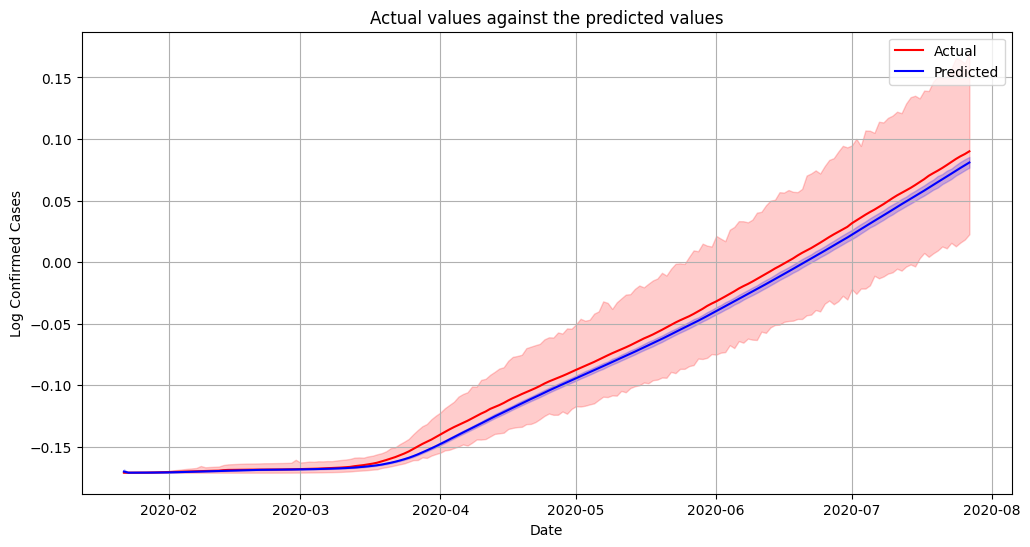

In [ ]:
# Prediction representation
plt.figure(figsize=(12, 6))


#Plot the actual values
sns.lineplot(x=covid_data['Date'], y=covid_data['log_Confirmed'], label='Actual', color='red')

# Plot the predicted values
sns.lineplot(x=covid_data['Date'], y=model_fit.predict(), label='Predicted', color='blue')

plt.title('Actual values against the predicted values')
plt.xlabel('Date')
plt.ylabel('Log Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()
